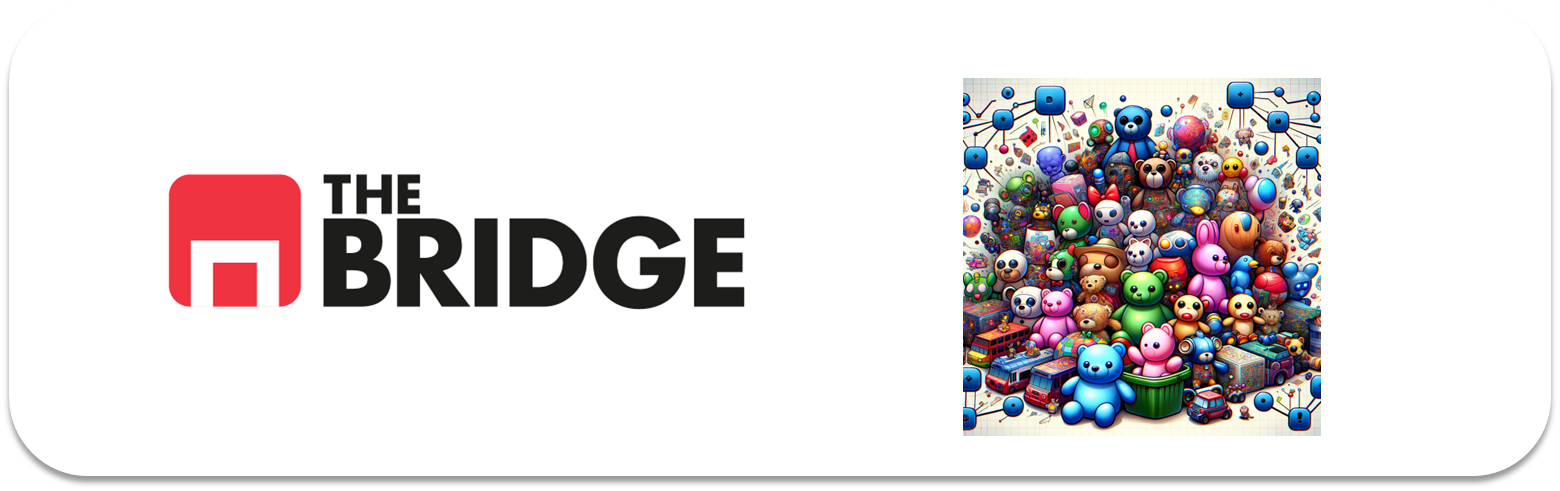

## PRACTICA OBLIGATORIA: **K-Means Clustering**

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 

In [2]:
df = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/camilafiore/scikit_learn_data


### #1.1

Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [3]:
df.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
print(df["DESCR"])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [9]:
# Ver el target
df["target"]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [11]:
# Ver los datos
df["data"].shape

(400, 4096)

Eso significa:
- 400 imágenes
- Cada imagen es una fila
- Cada fila tiene 4096 números (64 × 64 píxeles)

In [13]:
# Crear un df con las features
X = pd.DataFrame(df["data"])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


In [15]:
# Crear el target como serie
y = pd.Series(df["target"])
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [16]:
# Juntar todo en un solo df
df = X.copy()
df["target"] = y

df["target"] = y
- df["target"]: crea una nueva columna llamada "target"
- =: le asignamos valores
- y: la columna de personas

In [19]:
# Mezclar aleatoriamente las imágenes
df_mixed = df.sample(frac=1, random_state=42).reset_index(drop=True)

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [27]:
# Primer split: df_mixed / 80% train vs 20% test (valid + test)
df_train, df_temp = train_test_split(
    df_mixed,
    test_size=0.2,
    stratify=df_mixed["target"],
    random_state=42
)

In [28]:
# Segundo split: temp_df / 10% validación vs 10% test
df_valid, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    stratify=temp_df["target"],
    random_state=42
)

In [29]:
# Comprobar que todo tiene sentido
len(df_train), len(df_valid), len(df_test)

(320, 40, 40)

Es este punto tengo mis imágenes mezcladas y repartidas en tres conjuntos, manteniendo el equilibrio entre personas.

### #1.4

Crea los pares X,y para train, validation y test.

In [33]:
# Separar X e y
X_train = df_train.drop("target", axis=1)
y_train = df_train["target"]

X_valid = df_valid.drop("target", axis=1)
y_valid = df_valid["target"]

X_test = df_test.drop("target", axis=1)
y_test = df_test["target"]

X_train, y_train


(         0         1         2         3         4         5         6     \
 383  0.632231  0.652893  0.582645  0.636364  0.636364  0.706612  0.747934   
 362  0.719008  0.727273  0.723140  0.714876  0.723140  0.731405  0.739669   
 140  0.185950  0.342975  0.512397  0.570248  0.628099  0.615702  0.652893   
 234  0.371901  0.487603  0.566116  0.586777  0.590909  0.615702  0.657025   
 399  0.326446  0.144628  0.260331  0.752066  0.847107  0.851240  0.847107   
 ..        ...       ...       ...       ...       ...       ...       ...   
 225  0.669421  0.677686  0.673554  0.673554  0.657025  0.636364  0.648760   
 376  0.706612  0.702479  0.735537  0.780992  0.789256  0.772727  0.789256   
 315  0.181818  0.338843  0.355372  0.404959  0.438017  0.458678  0.471074   
 393  0.578512  0.603306  0.632231  0.665289  0.677686  0.710744  0.723140   
 85   0.177686  0.243802  0.293388  0.293388  0.380165  0.541322  0.694215   
 
          7         8         9     ...      4086      4087   

X_train:
- Tipo: DataFrame
- Forma: (n_imágenes, 4096)
- Cada fila: una imagen
- Cada columna: un píxel

y_train:
- Tipo: Series
- Forma: (n_imágenes,)
- Cada valor: una persona (0 - 39)

Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [53]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

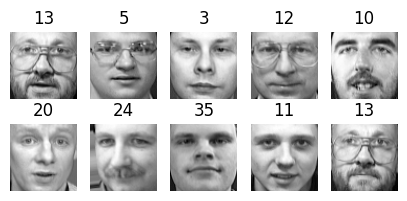

In [54]:
# Visualizar caras
plot_faces(
    X_train.iloc[:10].values,
    y_train.iloc[:10].values
)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [55]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

np.int64(221)

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [71]:
# Probar varios k (con KMeans)
sil_scores = []

for k in range(5, 151, 5):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_pca)
    score = silhouette_score(X_train_pca, labels)
    sil_scores.append((k, score))

In [57]:
# Mostrar el k con mejor Silueta
best_k, best_score = max(sil_scores, key=lambda x: x[1])
print("Mejor k:", best_k)
print("Mejor Silueta:", best_score)

Mejor k: 120
Mejor Silueta: 0.20884576439857483


### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

In [58]:
# Probar Inercia
inertias = []

for k in range(5, 151, 5):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)
    inertias.append((k, kmeans.inertia_))

In [59]:
# Mostrar Inercia
for k, inertia in inertias:
    print(k, inertia)

5 17016.08984375
10 14948.4453125
15 13548.19921875
20 12366.642578125
25 11310.173828125
30 10582.359375
35 9852.673828125
40 9141.8642578125
45 8523.201171875
50 8007.9208984375
55 7662.91259765625
60 7236.3623046875
65 6849.458984375
70 6484.29296875
75 6057.56298828125
80 5812.49267578125
85 5542.0888671875
90 5298.298828125
95 4956.75048828125
100 4725.63427734375
105 4462.26611328125
110 4230.3125
115 4023.39306640625
120 3836.421630859375
125 3605.451171875
130 3414.309326171875
135 3275.615234375
140 3095.16650390625
145 2954.835205078125
150 2757.97802734375


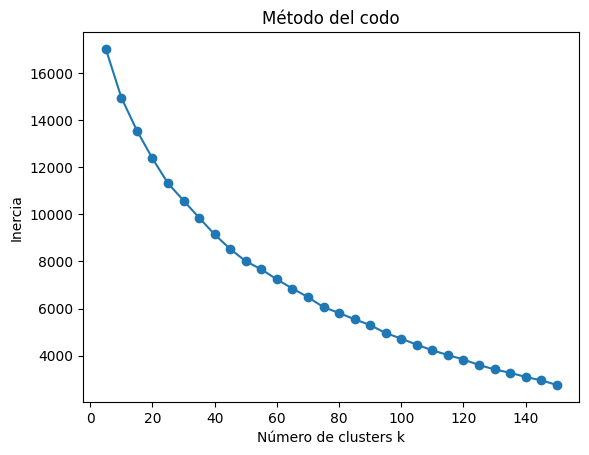

In [60]:
# Dibujar un gráfico bonito
ks, values = zip(*inertias)
plt.plot(ks, values, marker="o")
plt.xlabel("Número de clusters k")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.show()

- Inercia: distancia puntos <> centroide
- Graficando vs k: buscamos “codo”
- Silhouette: calidad de asignación
- Ambos ayudan a decidir el mejor k antes de crear el modelo final

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [70]:
# Entrenar un K-Means final con ese k
# Guardarlo en una variable best_model para usarlo luego
best_model = KMeans(
    n_clusters=best_k,
    random_state=42,
    n_init=10
)

best_model.fit(X_train_pca)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",120
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


best_model contiene:
- best_model.cluster_centers_: coordenadas de cada centroide
- best_model.labels_: cluster asignado a cada fila de entrenamiento
- best_model.inertia_: inercia final
- best_model.n_clusters: mi best_k

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

In [62]:
# Crear función para mostrar caras por cluster
def plot_faces_by_cluster(X_original, labels, n_clusters=10, n_faces=10):
    """
    X_original: datos originales (sin PCA)
    labels: etiquetas asignadas por K-Means
    n_clusters= cuántos clusters mostrar
    n_faces: cuántas caras por cluster
    """
    for cluster in range(n_clusters):
        cluster_indices = np.where(labels == cluster)[0]
        selected = cluster_indices[:n_faces]
        faces_to_show = X_original.iloc[selected].values
        plot_faces(faces_to_show, [cluster]*len(faces_to_show))

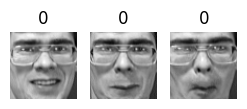

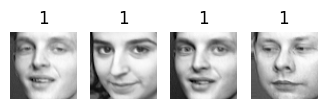

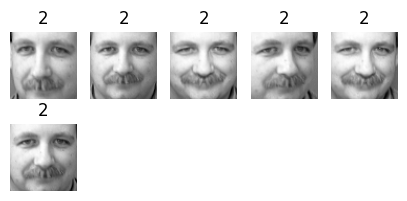

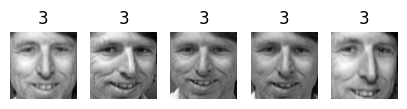

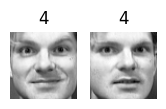

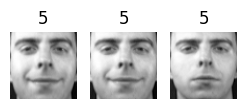

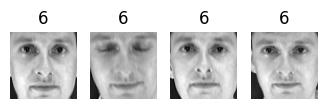

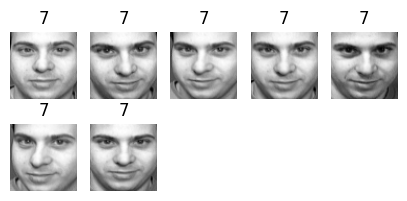

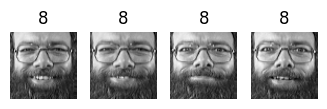

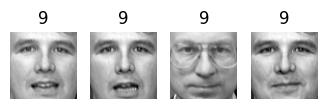

In [64]:
# Usar función
labels_train = best_model.labels_
plot_faces_by_cluster(X_train, labels_train, n_clusters=10, n_faces=10)

- Tomamos labels del modelo
- Seleccionamos imágenes originales
- Mostramos caras por cluster
- Visualmente comprobamos si K-Means hizo un buen trabajo

## **#2**


### #2.1

Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [ ]:
# Crear RandomForest
rf = RandomForestClassifier(
    n_estimators=150,
    random_state=42
)

# Entrenar RandomForest
rf.fit(X_train, y_train)

# Predecir (Validación)
y_valid_pred = rf.predict(X_valid)

# Evaluar (Precisión)
acc = accuracy_score(y_valid, y_valid_pred)
print("Accuracy en Validación:", acc)

Accuracy de Validación: 0.925


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```

Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [ ]:
# Transfromar datasets (con K-Means)
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

# Entrenar RandomForest
rf_reduced = RandomForestClassifier(
    n_estimators=150,
    random_state=42
)
rf_reduced.fit(X_train_reduced, y_train)

# Predecir y evaluar
y_valid_reduced_pred = rf_reduced.predict(X_valid_reduced)
acc_reduced = accuracy_score(y_valid, y_valid_reduced_pred)
print("Accuracy en Validación con K-Means:", acc_reduced)

Accuracy en Validación con K-Means: 0.8


### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

In [74]:
# Probar varios k (con RandomForest)
k_values = range(5, 151, 5)
best_acc = 0
best_k = None

for k in k_values:
    # Entrenar K-Means con este k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)

    # Transformar datos a distancias
    X_train_k = kmeans.transform(X_train_pca)
    X_valid_k = kmeans.transform(X_valid_pca)

    # Entrenar RandomForest
    rf = RandomForestClassifier(n_estimators=150, random_state=42)
    rf.fit(X_train_k, y_train)

    # Predecir y evaluar
    y_valid_pred = rf.predict(X_valid_k)
    acc = accuracy_score(y_valid, y_valid_pred)

    # Guardar mejor resultado
    if acc > best_acc:
        best_acc = acc
        best_k = k

print("Mejor k:", best_k)
print("Mejor Accuracy:", best_acc)

Mejor k: 40
Mejor Accuracy: 0.825
